In [ ]:
# This notebook analyzes the Maglev Hash. Use it with https://github.com/pengubco/algorithms/blob/main/maglev_hash/analysis/main.go. 

In [78]:
import pandas as pd
import json  
import subprocess
import plotly.express as px
from plotly.offline import plot

In [52]:
# change to the path where the https://github.com/pengubco/algorithms/blob/main/maglev_hash/analysis/main.go is built.
# maglev_analysis_command = './maglev_hash/analysis/main' 

In [72]:
def get_cv_and_overhead_for_node_slot(node_cnt, slot_cnt): 
    """Return coefficient of variation (cv) and slowM """
    command = [maglev_analysis_command, f"-nodeCnt={node_cnt}", f"-slotCnt={slot_cnt}"]
    result = subprocess.run(command, capture_output=True, text=True)
    lines = result.stdout.split('\n')
    node_cnt = int(lines[0].strip())
    slot_cnt = int(lines[1].strip())
    node_load = json.loads(lines[2].strip())
    df = pd.DataFrame({'values': node_load})
    cv = df['values'].std() / df['values'].mean()
    slot_moved = int(lines[3].strip())
    return {
        'node_cnt': node_cnt,
        'slot_cnt': slot_cnt,
        'cv': cv,
        'slot_move_overhead': slot_moved/(slot_cnt/node_cnt) -1 
    }

In [58]:
def is_prime(num):
    """Check if a number is prime."""
    if num < 2:
        return False
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True

def next_prime_after_n(n):
    """Find the next prime number larger than n."""
    candidate = n + 1
    while True:
        if is_prime(candidate):
            return candidate
        candidate += 1

In [110]:
def get_cv_and_overhead_for_node(node_cnt):
    data = []
    for i in range(10, 510, 20):
        slot_cnt = next_prime_after_n(i*node_cnt)
        result = get_cv_and_overhead_for_node_slot(node_cnt, slot_cnt)
        data.append((result['slot_cnt'], result['cv'], round(result['slot_move_overhead'],4)))
    return data

In [111]:
cv_and_overhead = get_cv_and_overhead_for_node(10)

In [112]:
df = pd.DataFrame(cv_and_overhead, columns=['slot_cnt', 'cv', 'slot_move_overhead'])

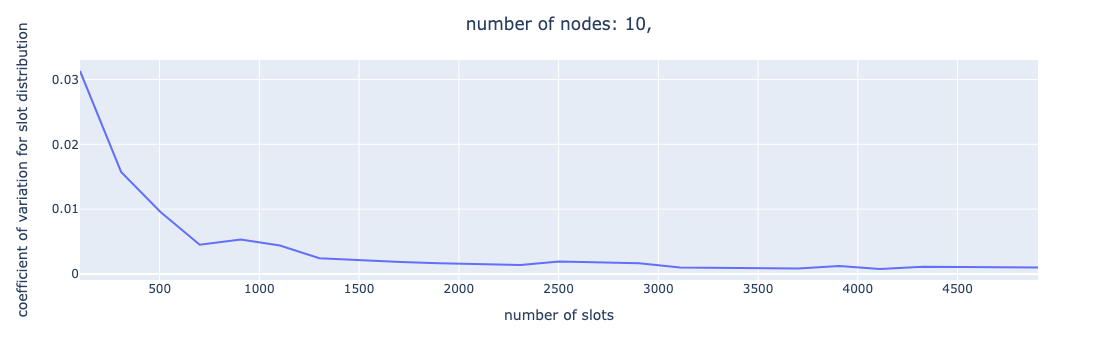

In [116]:
fig = px.line(df, x='slot_cnt', y='cv')
fig.update_layout(title={'text':'number of nodes: 10, ', 'x':0.5}, 
                  xaxis_title='number of slots',
                 yaxis_title='coefficient of variation for slot distribution')                  

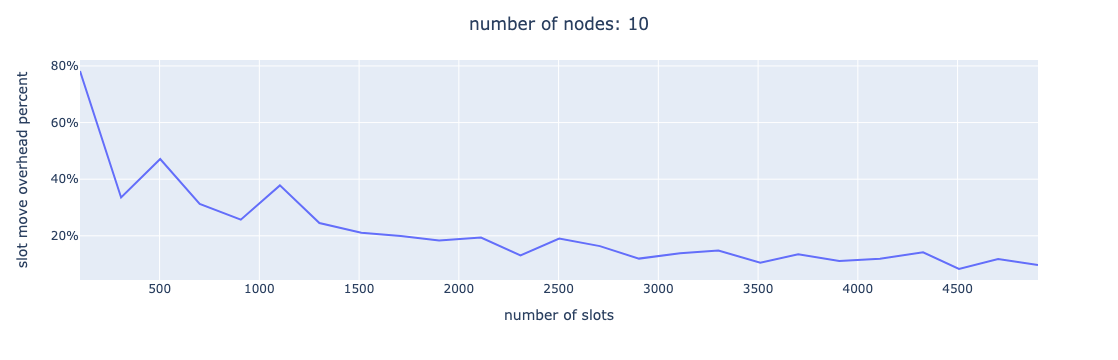

In [115]:
fig = px.line(df, x='slot_cnt', y='slot_move_overhead')
fig.update_layout(title={'text':'number of nodes: 10', 'x':0.5}, 
                  xaxis_title='number of slots',
                 yaxis_title='slot move overhead percentage',
                  yaxis_tickformat=',.0%',
                 )

In [118]:
cv_and_overhead = get_cv_and_overhead_for_node(100)
df = pd.DataFrame(cv_and_overhead, columns=['slot_cnt', 'cv', 'slot_move_overhead'])

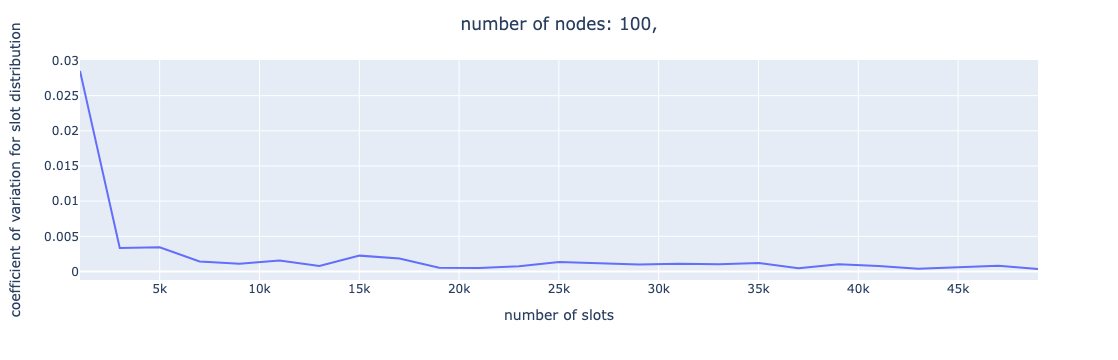

In [121]:
fig = px.line(df, x='slot_cnt', y='cv')
fig.update_layout(title={'text':'number of nodes: 100, ', 'x':0.5}, 
                  xaxis_title='number of slots',
                 yaxis_title='coefficient of variation for slot distribution')                  

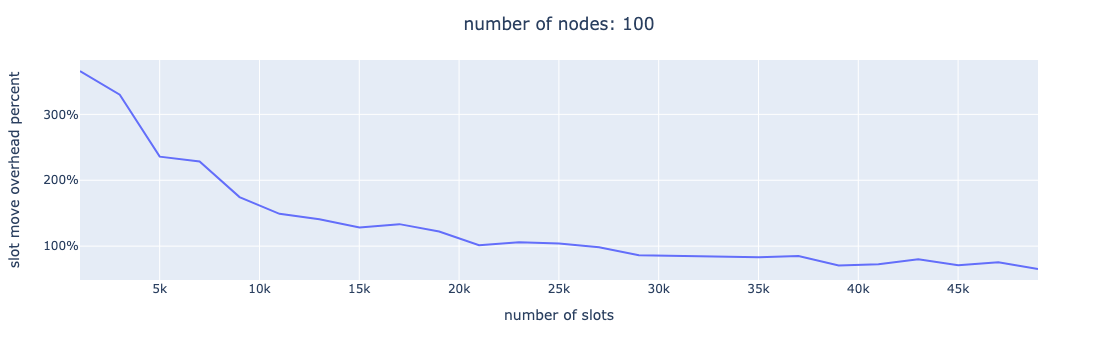

In [122]:
fig = px.line(df, x='slot_cnt', y='slot_move_overhead')
fig.update_layout(title={'text':'number of nodes: 100', 'x':0.5}, 
                  xaxis_title='number of slots',
                 yaxis_title='slot move overhead percentage',
                  yaxis_tickformat=',.0%',
                 )

In [134]:
def write_figs_to_htmls(node_cnt):
    """generate two figures and write each to a html file"""
    cv_and_overhead = get_cv_and_overhead_for_node(node_cnt)
    df = pd.DataFrame(cv_and_overhead, columns=['slot_cnt', 'cv', 'slot_move_overhead'])
    fig_cv = px.line(df, x='slot_cnt', y='cv')
    title = f"number of nodes: {node_cnt}"
    fig_cv.update_layout(title={'text':title, 'x':0.5}, 
                  xaxis_title='number of slots',
                 yaxis_title='coefficient of variation for slot distribution')  
    html_string = plot(fig_cv, output_type='div')
    with open(f"{node_cnt}_cv.html", 'w') as file:
        file.write(html_string)

    fig_overhead = px.line(df, x='slot_cnt', y='slot_move_overhead')
    fig_overhead.update_layout(title={'text':title, 'x':0.5}, 
                  xaxis_title='number of slots',
                 yaxis_title='slot move overhead percentage',
                  yaxis_tickformat=',.0%',
                 )
    html_string = plot(fig_overhead, output_type='div')
    with open(f"{node_cnt}_overhead.html", 'w') as file:
        file.write(html_string)

In [135]:
write_figs_to_htmls(10)

In [136]:
write_figs_to_htmls(100)